# Red neuronal para predecir poses

## Importar librerias

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from keras import layers,callbacks
from keras.models import Sequential, load_model
from keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

2025-07-15 14:39:39.854687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 14:39:39.862390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752611979.872075   15954 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752611979.874726   15954 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752611979.881466   15954 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Preparar datos (Entrenamiento y Validacion)

In [5]:
CARPETA=Path("../data").resolve()
Salida=Path("dataset_completo.csv")
#
# Unir los csvs para hacer uno solo
csvs = [p.resolve() for p in CARPETA.rglob("*.csv") if p.stem!=Salida]
for ruta in csvs:
    print(ruta.parent.stem)
#df=pd.concat((pd.read_csv(f) for f in csvs),ignore_index=True)
#df = df.drop_duplicates().reset_index(drop=True)
#df.to_csv(CARPETA/Salida, index=False, float_format="%.6f")

#print(df)

#X= df.drop(columns=['label'])
#Y= df['label']

#poses_lb=LabelBinarizer()
#Y_one_hot= poses_lb.fit_transform(Y)
#print(Y_one_hot)

test_csv
test_csv
test_csv
test_csv
train_val_csv
train_val_csv
train_val_csv
train_val_csv


## Dividir datos en:
* Entrenamiento = 70%
* Validación = 15%
* Prueba = 15%

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y_one_hot, test_size=0.30, stratify=Y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp.argmax(1), random_state=42)

## Definicion y compilacion de Red Neuronal

In [4]:
n_features = X_train.shape[1]   # 36 o 99
n_classes  = y_train.shape[1]
#print(n_features,n_classes)
#
model = Sequential([
    layers.Input( shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.30),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.30),
    layers.Dense(n_classes, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

I0000 00:00:1752468815.316591  246163 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4728 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


## Entrenamiento

In [5]:
checkpoint = callbacks.ModelCheckpoint(
    "best_model.keras", save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    epochs=130,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint],
    verbose=2)


Epoch 1/130


I0000 00:00:1752468816.332333  246318 service.cc:152] XLA service 0x7d49900032c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752468816.332345  246318 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-13 22:53:36.351044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752468816.453688  246318 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752468817.770143  246318 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 - 3s - 1s/step - accuracy: 0.2580 - loss: 2.2273 - val_accuracy: 0.2727 - val_loss: 1.3641
Epoch 2/130
3/3 - 0s - 26ms/step - accuracy: 0.5036 - loss: 1.3289 - val_accuracy: 0.2810 - val_loss: 1.3337
Epoch 3/130
3/3 - 0s - 24ms/step - accuracy: 0.6833 - loss: 0.8660 - val_accuracy: 0.3471 - val_loss: 1.3094
Epoch 4/130
3/3 - 0s - 24ms/step - accuracy: 0.7722 - loss: 0.6247 - val_accuracy: 0.4298 - val_loss: 1.2848
Epoch 5/130
3/3 - 0s - 23ms/step - accuracy: 0.7900 - loss: 0.5225 - val_accuracy: 0.4959 - val_loss: 1.2616
Epoch 6/130
3/3 - 0s - 23ms/step - accuracy: 0.8488 - loss: 0.4229 - val_accuracy: 0.6116 - val_loss: 1.2362
Epoch 7/130
3/3 - 0s - 24ms/step - accuracy: 0.8648 - loss: 0.3547 - val_accuracy: 0.6198 - val_loss: 1.2149
Epoch 8/130
3/3 - 0s - 24ms/step - accuracy: 0.8826 - loss: 0.3217 - val_accuracy: 0.6364 - val_loss: 1.1981
Epoch 9/130
3/3 - 0s - 23ms/step - accuracy: 0.8826 - loss: 0.3069 - val_accuracy: 0.6942 - val_loss: 1.1857
Epoch 10/130
3/3 - 0s - 23ms/step

## Evaluación

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en test: {test_acc:.3f}")


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
print(cm)
print(classification_report(y_test.argmax(1), y_pred.argmax(1), target_names=poses_lb.classes_))

#Distancia cosenoidal entre los datos (Por cada clase)
#Tomar 10 frames de cada segundo

Accuracy en test: 1.000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[29  0  0  0]
 [ 0 31  0  0]
 [ 0  0 40  0]
 [ 0  0  0 21]]
                 precision    recall  f1-score   support

BRAZOS_CRUZADOS       1.00      1.00      1.00        29
         FIRMES       1.00      1.00      1.00        31
           OTRO       1.00      1.00      1.00        40
 POSICION_FETAL       1.00      1.00      1.00        21

       accuracy                           1.00       121
      macro avg       1.00      1.00      1.00       121
   weighted avg       1.00      1.00      1.00       121



## Graficas de resultados

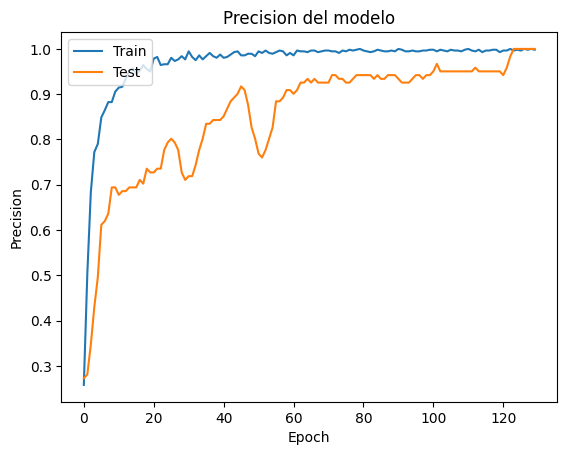

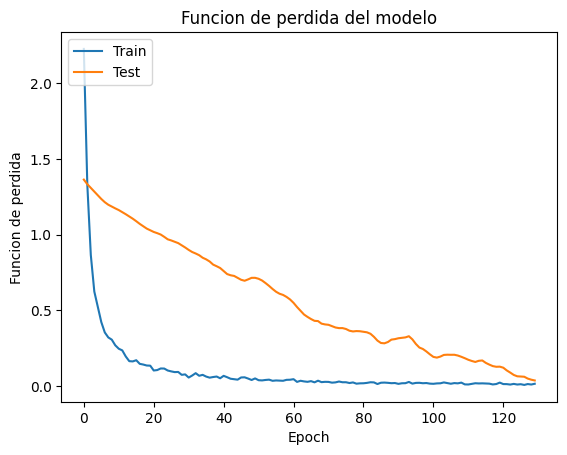

In [7]:
#Evaluar resultados
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Funcion de perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida del modelo')
plt.ylabel('Funcion de perdida')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Uso del modelo para predicción

In [8]:
from ExtraeFrame import IMAGEN

imagen=IMAGEN("Fotos/foto1.png")
x_new=imagen.extrae(muestra=True)
x_new=np.array([x_new])
print(x_new)
print(len(x_new))

prediccion  = model.predict(x_new)
print (prediccion)
label  = poses_lb.inverse_transform(prediccion)
print(label)


I0000 00:00:1752468829.045209  246163 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1752468829.086264  264519 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.144.03), renderer: NVIDIA GeForce RTX 4060 Laptop GPU/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1752468829.122143  264487 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1752468829.182535  264514 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1752468829.231970  264514 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Analizando Imagen
[[ 5.23094952e-01  1.20680392e-01 -1.10749304e+00  5.37418842e-01
   1.05304182e-01 -1.07233155e+00  5.49823105e-01  1.05817318e-01
  -1.07322717e+00  5.60983956e-01  1.06848300e-01 -1.07332516e+00
   5.05701184e-01  1.06525421e-01 -1.07854617e+00  4.95015621e-01
   1.07866347e-01 -1.07934701e+00  4.83532339e-01  1.09528184e-01
  -1.07992828e+00  5.72957575e-01  1.16865985e-01 -8.04148138e-01
   4.63324785e-01  1.23029411e-01 -8.28087091e-01  5.46302676e-01
   1.43062979e-01 -9.96362388e-01  5.04535496e-01  1.43918991e-01
  -1.00809872e+00  6.69096351e-01  2.40315020e-01 -5.91766596e-01
   3.77037197e-01  2.49148011e-01 -5.93166471e-01  7.08043098e-01
   3.88647765e-01 -4.70983297e-01  3.44794154e-01  4.02575284e-01
  -6.12991154e-01  7.09387064e-01  5.13113260e-01 -6.41297638e-01
   3.61843735e-01  5.28976023e-01 -8.68515193e-01  7.05571771e-01
   5.57663202e-01 -7.12927341e-01  3.61250997e-01  5.70110023e-01
  -9.64822769e-01  6.83457613e-01  5.57052135e-01 -7.97202